<a href="https://colab.research.google.com/github/Sarahgrazie/Kaggle_1/blob/master/04022025%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import matplotlib as mpl             # 기본 설정 만지는 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

In [ ]:
### 나눔 고딕 설치
!apt-get update -qq   # 설치를 업데이트   -qq  : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum*   =>  ttf-nanum, ttf-nanum-coding, tt

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

NanumGothic Eco


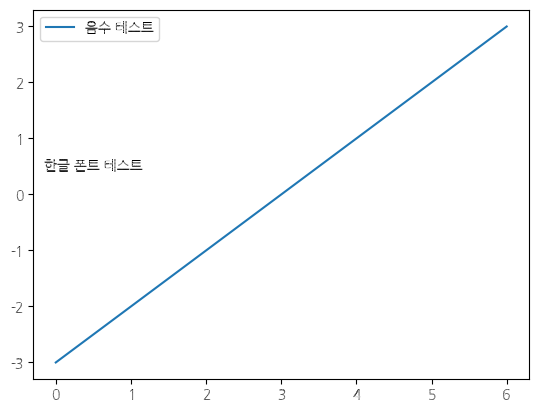

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 폰트 파일 경로
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

# 폰트 프로퍼티 생성
font_prop = fm.FontProperties(fname=path, size=10)
font_name = font_prop.get_name()
print(font_name)  # NanumGothic Eco

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(path)

# matplotlib에 폰트 설정
plt.rc('font', family=font_name)

# 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

# 예제 플롯
plt.figure()
plt.plot([-3, -2, -1, 0, 1, 2, 3], label='음수 테스트')
plt.text(0.5, 0.5, '한글 폰트 테스트', ha='center', va='center', fontproperties=font_prop)
plt.legend()
plt.show()

In [ ]:
import os
from collections import Counter
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
# 텍스트 파일 경로
file_paths = [
    "01_다른경쟁사와간단비교.txt",
    "02_기업리서치관련정리.txt",
    "03_생성AI분석.txt"
]

# 한국어 불용어 추가
# 수동으로 정의한 한국어 불용어 리스트
korean_stopwords = {
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로',
    '자', '에', '와', '한', '하다', '에서', '것', '및', '위해', '그', '되다'
}

additional_stopwords = {'강점', '약점', '경쟁사'}  # 분석에 불필요한 단어 추가
korean_stopwords.update(additional_stopwords)

In [ ]:
# 파일별 텍스트 처리 및 단어 빈도 계산
def process_text(text):
    # 텍스트 전처리: 소문자화, 특수 문자 제거, 불용어 제거
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in korean_stopwords and len(word) > 1]
    return words



파일 1의 상위 10개 단어:
[('공작기계', 29), ('솔루션', 16), ('기술', 16), ('있습니다', 15), ('자동화', 12), ('기업', 11), ('경쟁', 10), ('고객', 10), ('자동차', 9), ('부품', 9)]

파일 2의 상위 10개 단어:
[('있습니다', 4), ('페이지', 3), ('이벤트', 3), ('글로벌', 3), ('등을', 3), ('제공합니다', 3), ('기술', 3), ('화천기계의', 2), ('회사의', 2), ('최신', 2)]

파일 3의 상위 10개 단어:
[('있습니다', 9), ('글로벌', 7), ('공작기계', 6), ('있음', 6), ('브랜드', 6), ('기술', 5), ('상대적으로', 5), ('기업', 4), ('고객', 4), ('맞춤형', 4)]


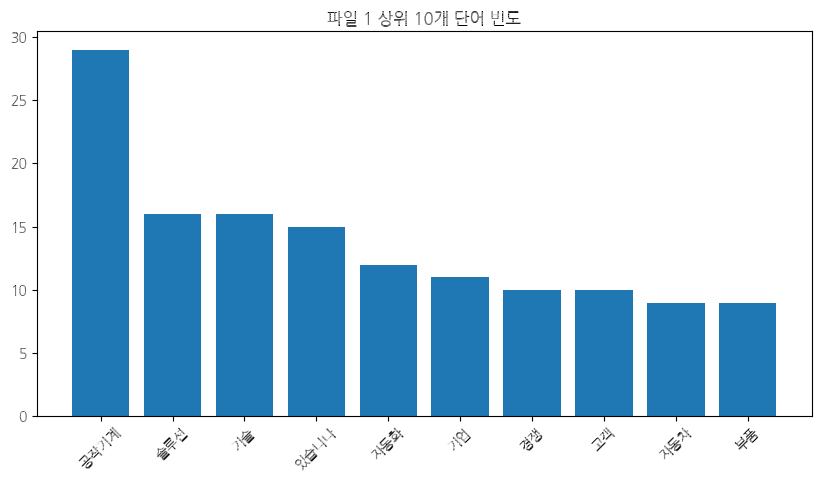

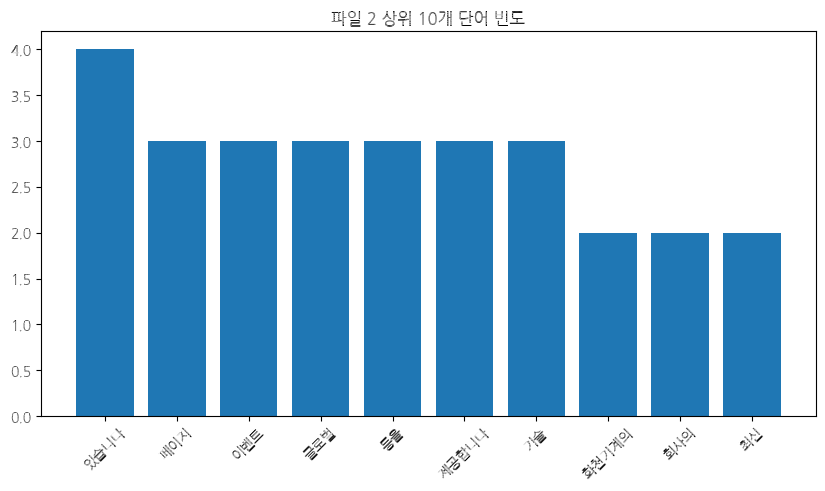

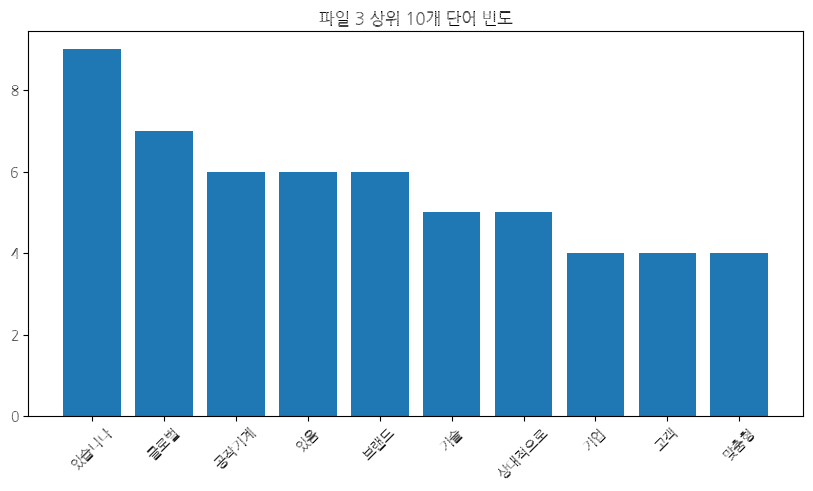

In [ ]:
# 빈도 분석 결과 저장
word_frequencies = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = process_text(text)
        word_freq = Counter(words)
        word_frequencies.append(word_freq)

# 파일별로 가장 자주 등장한 상위 10개 단어 출력
for i, freq in enumerate(word_frequencies):
    print(f"\n파일 {i+1}의 상위 10개 단어:")
    print(freq.most_common(10))

# 시각화: 파일별 상위 10개 단어 빈도
for i, freq in enumerate(word_frequencies):
    common_words = freq.most_common(10)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'파일 {i+1} 상위 10개 단어 빈도')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# 시각화: 파일별 상위 10개 단어 빈도
for i, freq in enumerate(word_frequencies):
    common_words = freq.most_common(10)
    print("common word : ", common_words)
    words, counts = zip(*common_words)
    print("워드와 카운트 : ",  words, counts)

common word :  [('공작기계', 29), ('솔루션', 16), ('기술', 16), ('있습니다', 15), ('자동화', 12), ('기업', 11), ('경쟁', 10), ('고객', 10), ('자동차', 9), ('부품', 9)]
워드와 카운트 :  ('공작기계', '솔루션', '기술', '있습니다', '자동화', '기업', '경쟁', '고객', '자동차', '부품') (29, 16, 16, 15, 12, 11, 10, 10, 9, 9)
common word :  [('있습니다', 4), ('페이지', 3), ('이벤트', 3), ('글로벌', 3), ('등을', 3), ('제공합니다', 3), ('기술', 3), ('화천기계의', 2), ('회사의', 2), ('최신', 2)]
워드와 카운트 :  ('있습니다', '페이지', '이벤트', '글로벌', '등을', '제공합니다', '기술', '화천기계의', '회사의', '최신') (4, 3, 3, 3, 3, 3, 3, 2, 2, 2)
common word :  [('있습니다', 9), ('글로벌', 7), ('공작기계', 6), ('있음', 6), ('브랜드', 6), ('기술', 5), ('상대적으로', 5), ('기업', 4), ('고객', 4), ('맞춤형', 4)]
워드와 카운트 :  ('있습니다', '글로벌', '공작기계', '있음', '브랜드', '기술', '상대적으로', '기업', '고객', '맞춤형') (9, 7, 6, 6, 6, 5, 5, 4, 4, 4)


In [ ]:
# 5. 리스트 언패킹
coordinates = [(1, 2), (3, 4), (5, 6)]
x_coords, y_coords = zip(*coordinates)
print("X 좌표들:", x_coords)
print("Y 좌표들:", y_coords)

X 좌표들: (1, 3, 5)
Y 좌표들: (2, 4, 6)


In [ ]:
from wordcloud import WordCloud

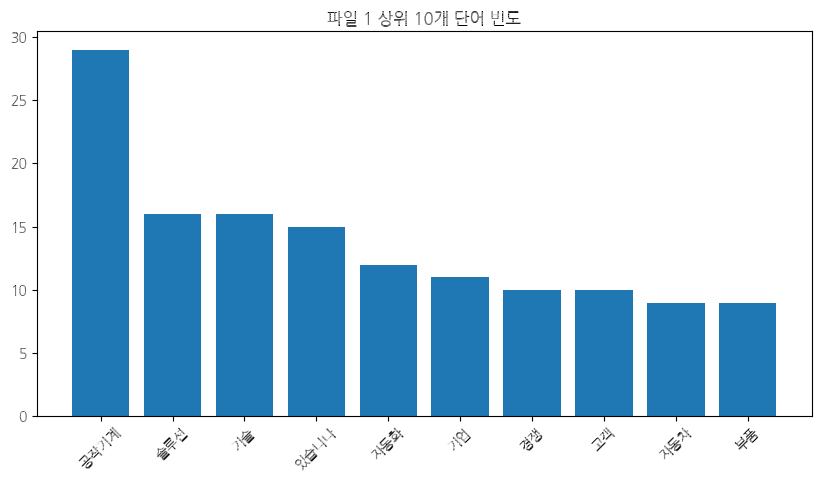

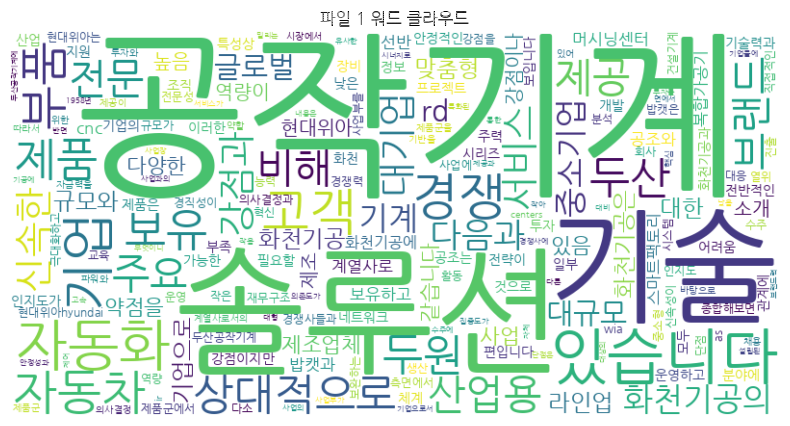

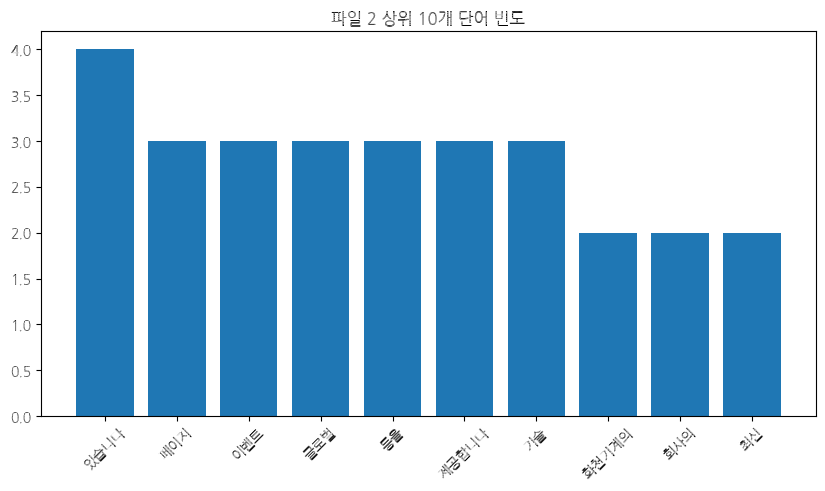

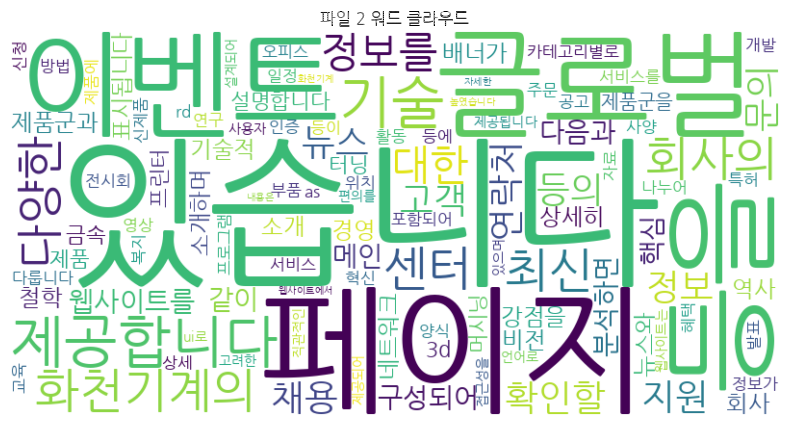

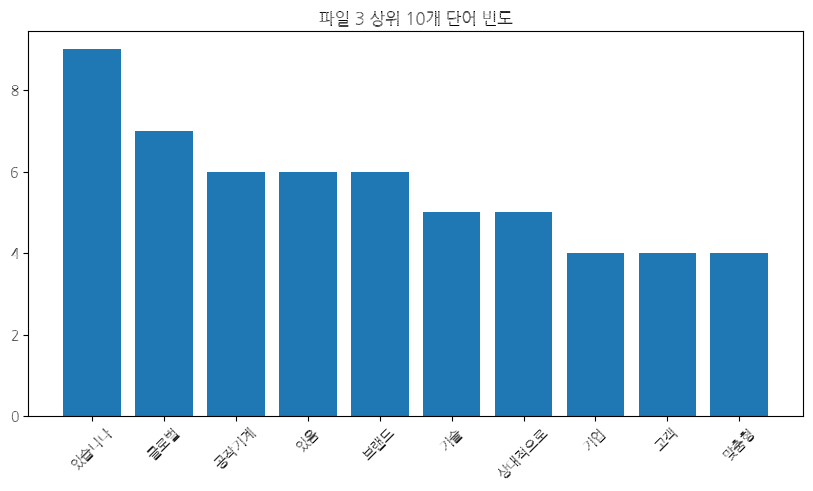

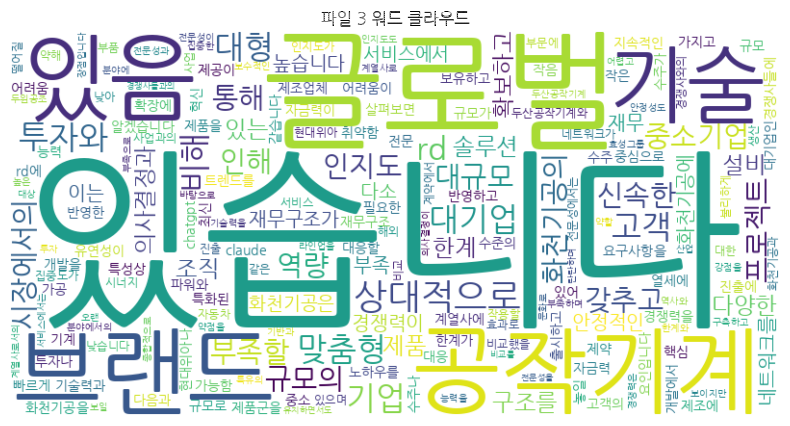

In [ ]:
# 시각화: 파일별 상위 10개 단어 빈도
for i, freq in enumerate(word_frequencies):
    common_words = freq.most_common(10)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'파일 {i+1} 상위 10개 단어 빈도')
    plt.xticks(rotation=45)
    plt.show()

    # 워드 클라우드 생성
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    ).generate_from_frequencies(freq)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'파일 {i+1} 워드 클라우드')
    plt.show()

In [ ]:
!pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.0 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=caaf244973bfce9b74d473f1babdc79a7f17f68225c1494b202296ab0fee2075
  Stored in directory: /root/.cache/pip/wheels/4d/57/58/7e3d7fedf51fe248b7fcee3df6945ae28638e22cddf01eb92b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5a9ff84a3e8eb431346f6e58538f4d96903bbb78817430b6133895ef0b44e37a
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built breadability docopt


In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 26.3 MB/s eta 0:00:00


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [ ]:
# 파일 경로 설정
file_paths = [
    "01_다른경쟁사와간단비교.txt",
    "02_기업리서치관련정리.txt",
    "03_생성AI분석.txt"
]


In [ ]:
# 파일 내용을 하나로 결합
combined_text = ""

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        combined_text += file.read() + "\n"

In [ ]:
# 결합된 텍스트를 이용해 요약 수행
parser = PlaintextParser.from_string(combined_text, Tokenizer("korean"))
summarizer = LsaSummarizer()

# 요약된 문장을 추출 (예: 5개의 문장으로 요약)
summary = summarizer(parser.document, sentences_count=5)

# 요약된 결과 출력
print("요약 결과:")
for sentence in summary:
    print(sentence)

요약 결과:
중소기업 특성상 고객 맞춤 형 솔루션 제공 능력 신속한 의사결정과 대응 체계 공작기계 분야에 집중하며 전문성 확보 약점: 상대적으로 작은 기업 규모와 낮은 브랜드 인지도 대규모 프로젝트 수주 및 글로벌 진출 역량 부족 연구개발 투자 및 기술 경쟁력 측면에서 열위 종합해 보면, 두 산 공작기계는 기술력과 제품 경쟁력이 강점이나 규모와 경직성이 약점이며, 화천 기공은 고객 밀착형 서비스와 신속성이 강점이나 전반적인 기업 역량이 상대적으로 약한 편입니다.
공작기계 전문 기업으로 기술 역량이 뛰어 남 중소기업 특성상 고객 맞춤 형 솔루션 제공 능력이 높음 신 속한 의사결정과 대응이 가능한 조직 구조 약점: 상대적으로 작은 기업 규모와 낮은 브랜드 인지도 대규모 프로젝트 수주 및 글로벌 진출 역량 부족
중소 제조업체 고객에 대한 대응력과 맞춤 형 솔루션 제공이 화천 기공에 비해 약할 수 있음. 종합하면, 두원 공조는 계열사로서의 브랜드 파워와 자금력이 강점이지만, 공작기계 분야의 전문 성과 중소기업 고객 대응력이 화천 기공에 비해 다소 약할 수 있습니다.
공작기계 제조에 특화된 핵심 기술력과 노하우를 보유하고 있음. 다양한 공작기계 제품군을 갖추고 있어 고객 맞춤 형 솔루션 제공이 가능함. 중소 제조업체 대응 능력
종합적으로, 화천 기공은 공작기계 분야에 집중한 전문 성과 고객 맞춤 형 서비스에서 강점을 보이지만, 기업 규모의 한계와 브랜드 인지도 부족으로 인해 글로벌 시장에서의 경쟁력은 상대적으로 약할 수 있습니다.
